In [648]:
import warnings
warnings.filterwarnings("ignore")

In [649]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

from simpledbf import Dbf5

import re
from tqdm import tqdm

In [650]:
res_22 = pd.read_csv('data/state_g22_sov_data_by_g22_srprec.csv')
res_22.head()

,COUNTY,FIPS,SRPREC,ELECTION,SRPREC_KEY,GEO_TYPE,ADDIST,CDDIST,SDDIST,BEDIST,...,SOSDEM01,SOSREP01,SPINOP01,SPINOP02,TRSDEM01,TRSREP01,USPDEM01,USPREP01,USSDEM01,USSREP01
0,1,6001,200100,g22,06001200100,srprec,14,12,7,2,...,2419,141,212,2035,2360,179,2415,132,2421,134
1,1,6001,200200,g22,06001200200,srprec,14,12,7,2,...,1516,100,113,1235,1470,115,1506,108,1520,104
2,1,6001,201400,g22,06001201400,srprec,14,12,7,2,...,2348,138,168,1965,2276,169,2329,132,2349,129
3,1,6001,202200,g22,06001202200,srprec,14,12,7,2,...,274,21,31,206,259,31,268,22,269,22
4,1,6001,202500,g22,06001202500,srprec,14,12,7,2,...,241,23,29,185,234,28,234,24,236,22


In [651]:
## 2022 data engineering

In [652]:
cols = res_22.columns.values
pr_cols = cols[[x.startswith('PR_') for x in cols]]
pr_cols

array(['PR_1_N', 'PR_1_Y', 'PR_26_N', 'PR_26_Y', 'PR_27_N', 'PR_27_Y',
       'PR_28_N', 'PR_28_Y', 'PR_29_N', 'PR_29_Y', 'PR_30_N', 'PR_30_Y',
       'PR_31_N', 'PR_31_Y'], dtype=object)

In [653]:
res_22 = res_22[np.append(pr_cols, 'SRPREC_KEY')]
res_22.head()

,PR_1_N,PR_1_Y,PR_26_N,PR_26_Y,PR_27_N,PR_27_Y,PR_28_N,PR_28_Y,PR_29_N,PR_29_Y,PR_30_N,PR_30_Y,PR_31_N,PR_31_Y,SRPREC_KEY
0,109,2372,1849,620,2260,264,391,2173,1604,859,1024,1516,284,2235,06001200100
1,85,1470,1151,416,1455,151,250,1356,1017,549,594,1000,205,1397,06001200200
2,104,2271,1686,672,2163,258,355,2100,1410,955,810,1643,298,2145,06001201400
3,24,252,173,103,230,50,46,237,150,123,73,215,58,224,06001202200
4,22,232,126,128,203,61,29,238,119,141,69,197,46,215,06001202500


In [654]:
props = np.unique([re.sub("_Y", "", re.sub("_N", "", pr)) for pr in pr_cols])
props

array(['PR_1', 'PR_26', 'PR_27', 'PR_28', 'PR_29', 'PR_30', 'PR_31'],
      dtype='<U5')

In [655]:
for pr in props:
    res_22[f'{pr}_TOT'] = res_22[f'{pr}_Y'] + res_22[f'{pr}_N']
res_22.head()

,PR_1_N,PR_1_Y,PR_26_N,PR_26_Y,PR_27_N,PR_27_Y,PR_28_N,PR_28_Y,PR_29_N,PR_29_Y,...,PR_31_N,PR_31_Y,SRPREC_KEY,PR_1_TOT,PR_26_TOT,PR_27_TOT,PR_28_TOT,PR_29_TOT,PR_30_TOT,PR_31_TOT
0,109,2372,1849,620,2260,264,391,2173,1604,859,...,284,2235,06001200100,2481,2469,2524,2564,2463,2540,2519
1,85,1470,1151,416,1455,151,250,1356,1017,549,...,205,1397,06001200200,1555,1567,1606,1606,1566,1594,1602
2,104,2271,1686,672,2163,258,355,2100,1410,955,...,298,2145,06001201400,2375,2358,2421,2455,2365,2453,2443
3,24,252,173,103,230,50,46,237,150,123,...,58,224,06001202200,276,276,280,283,273,288,282
4,22,232,126,128,203,61,29,238,119,141,...,46,215,06001202500,254,254,264,267,260,266,261


In [656]:
## Crosswalk data

In [657]:
cw_22 = pd.read_csv('crosswalk/state_g22_sr_blk_map.csv')
cw_24 = pd.read_csv('crosswalk/state_g24_sr_blk_map.csv')
cw_22.head()

,COUNTY,BLOCK_KEY,FIPS,SRPREC,TRACT,SRPREC_KEY,ELECTION,GEO_TYPE,BLOCK,BLKREG,SRTOTREG,PCTSRPREC,BLKTOTREG,PCTBLK
0,1,60014211001000,6001,200100,421100,06001200100,g22,sr_blk,1000,56,3472.0,1.612903,56,100.0
1,1,60014211001001,6001,200100,421100,06001200100,g22,sr_blk,1001,42,3472.0,1.209677,42,100.0
2,1,60014211001002,6001,200100,421100,06001200100,g22,sr_blk,1002,86,3472.0,2.476959,86,100.0
3,1,60014211001003,6001,200100,421100,06001200100,g22,sr_blk,1003,110,3472.0,3.168203,110,100.0
4,1,60014211001004,6001,200100,421100,06001200100,g22,sr_blk,1004,92,3472.0,2.649770,92,100.0


In [658]:
cw_24.head()

,COUNTY,BLOCK_KEY,FIPS,SRPREC,TRACT,SRPREC_KEY,ELECTION,GEO_TYPE,BLOCK,BLKREG,SRTOTREG,PCTSRPREC,BLKTOTREG,PCTBLK
0,1,60014211001000,6001,200100,421100,06001200100,g24,sr_blk,1000,68,3516.0,1.934016,68,100.0
1,1,60014211001001,6001,200100,421100,06001200100,g24,sr_blk,1001,54,3516.0,1.535836,54,100.0
2,1,60014211001002,6001,200100,421100,06001200100,g24,sr_blk,1002,96,3516.0,2.730375,96,100.0
3,1,60014211001003,6001,200100,421100,06001200100,g24,sr_blk,1003,122,3516.0,3.469852,122,100.0
4,1,60014211001004,6001,200100,421100,06001200100,g24,sr_blk,1004,89,3516.0,2.531286,89,100.0


In [659]:
cw_22.shape, cw_24.shape

((390976, 14), (421137, 14))

In [660]:
# Case 1: blocks fully enclosed in both 2022 and 2024 precincts
cw = pd.merge(left=cw_22, right=cw_24, on='BLOCK_KEY', how='inner')
cw_partial = cw[~(cw['PCTBLK_x'] == 100) |
    ~(cw['PCTBLK_y'] == 100)]
cw = cw[(cw['PCTBLK_x'] == 100) &
    (cw['PCTBLK_y'] == 100)]
cw.head()

,COUNTY_x,BLOCK_KEY,FIPS_x,SRPREC_x,TRACT_x,SRPREC_KEY_x,ELECTION_x,GEO_TYPE_x,BLOCK_x,BLKREG_x,...,TRACT_y,SRPREC_KEY_y,ELECTION_y,GEO_TYPE_y,BLOCK_y,BLKREG_y,SRTOTREG_y,PCTSRPREC_y,BLKTOTREG_y,PCTBLK_y
0,1,60014211001000,6001,200100,421100,06001200100,g22,sr_blk,1000,56,...,421100,06001200100,g24,sr_blk,1000,68,3516.0,1.934016,68,100.0
1,1,60014211001001,6001,200100,421100,06001200100,g22,sr_blk,1001,42,...,421100,06001200100,g24,sr_blk,1001,54,3516.0,1.535836,54,100.0
2,1,60014211001002,6001,200100,421100,06001200100,g22,sr_blk,1002,86,...,421100,06001200100,g24,sr_blk,1002,96,3516.0,2.730375,96,100.0
3,1,60014211001003,6001,200100,421100,06001200100,g22,sr_blk,1003,110,...,421100,06001200100,g24,sr_blk,1003,122,3516.0,3.469852,122,100.0
4,1,60014211001004,6001,200100,421100,06001200100,g22,sr_blk,1004,92,...,421100,06001200100,g24,sr_blk,1004,89,3516.0,2.531286,89,100.0


In [661]:
cw.shape

(329448, 27)

In [662]:
cons = pd.merge(left=cw, right=res_22, left_on='SRPREC_KEY_x', right_on='SRPREC_KEY', how='inner')
cons.head()

,COUNTY_x,BLOCK_KEY,FIPS_x,SRPREC_x,TRACT_x,SRPREC_KEY_x,ELECTION_x,GEO_TYPE_x,BLOCK_x,BLKREG_x,...,PR_31_N,PR_31_Y,SRPREC_KEY,PR_1_TOT,PR_26_TOT,PR_27_TOT,PR_28_TOT,PR_29_TOT,PR_30_TOT,PR_31_TOT
0,1,60014211001000,6001,200100,421100,06001200100,g22,sr_blk,1000,56,...,284,2235,06001200100,2481,2469,2524,2564,2463,2540,2519
1,1,60014211001001,6001,200100,421100,06001200100,g22,sr_blk,1001,42,...,284,2235,06001200100,2481,2469,2524,2564,2463,2540,2519
2,1,60014211001002,6001,200100,421100,06001200100,g22,sr_blk,1002,86,...,284,2235,06001200100,2481,2469,2524,2564,2463,2540,2519
3,1,60014211001003,6001,200100,421100,06001200100,g22,sr_blk,1003,110,...,284,2235,06001200100,2481,2469,2524,2564,2463,2540,2519
4,1,60014211001004,6001,200100,421100,06001200100,g22,sr_blk,1004,92,...,284,2235,06001200100,2481,2469,2524,2564,2463,2540,2519


In [663]:
cons.shape

(329441, 49)

In [664]:
cons.columns.values

array(['COUNTY_x', 'BLOCK_KEY', 'FIPS_x', 'SRPREC_x', 'TRACT_x',
       'SRPREC_KEY_x', 'ELECTION_x', 'GEO_TYPE_x', 'BLOCK_x', 'BLKREG_x',
       'SRTOTREG_x', 'PCTSRPREC_x', 'BLKTOTREG_x', 'PCTBLK_x', 'COUNTY_y',
       'FIPS_y', 'SRPREC_y', 'TRACT_y', 'SRPREC_KEY_y', 'ELECTION_y',
       'GEO_TYPE_y', 'BLOCK_y', 'BLKREG_y', 'SRTOTREG_y', 'PCTSRPREC_y',
       'BLKTOTREG_y', 'PCTBLK_y', 'PR_1_N', 'PR_1_Y', 'PR_26_N',
       'PR_26_Y', 'PR_27_N', 'PR_27_Y', 'PR_28_N', 'PR_28_Y', 'PR_29_N',
       'PR_29_Y', 'PR_30_N', 'PR_30_Y', 'PR_31_N', 'PR_31_Y',
       'SRPREC_KEY', 'PR_1_TOT', 'PR_26_TOT', 'PR_27_TOT', 'PR_28_TOT',
       'PR_29_TOT', 'PR_30_TOT', 'PR_31_TOT'], dtype=object)

In [665]:
cons['PCTSRPREC_y'] = cons['PCTSRPREC_y'] / 100
cons['PCTSRPREC_x'] = cons['PCTSRPREC_x'] / 100

In [666]:
for pr in props:
    cons[f'{pr}_Y'] = cons[f'{pr}_Y'] * (cons['BLKREG_x'] / cons['SRTOTREG_x'])
    cons[f'{pr}_N'] = cons[f'{pr}_N'] * (cons['BLKREG_x'] / cons['SRTOTREG_x'])
    cons[f'{pr}_TOT'] = cons[f'{pr}_TOT'] * (cons['BLKREG_x'] / cons['SRTOTREG_x'])

In [667]:
# prec_24 = np.unique(cons['SRPREC_KEY_y'].astype(str))
# res_22_in_24 = pd.DataFrame()

# for prec in tqdm(prec_24):
#     blk_prec = cons[cons['SRPREC_KEY_y'] == prec]
#     totpop = np.sum(blk_prec['BLKREG_y'])
#     for pr in props:
#         blk_prec[f'{pr}_Y'] = blk_prec[f'{pr}_Y'] * (blk_prec['BLKREG_y'] / totpop)
#         blk_prec[f'{pr}_N'] = blk_prec[f'{pr}_N'] * (blk_prec['BLKREG_y'] / totpop)
#         blk_prec[f'{pr}_TOT'] = blk_prec[f'{pr}_TOT'] * (blk_prec['BLKREG_y'] / totpop)
#     res_22_in_24 = pd.concat([res_22_in_24, blk_prec], axis=0)

# res_22_in_24.head()

In [668]:
cons.head()

,COUNTY_x,BLOCK_KEY,FIPS_x,SRPREC_x,TRACT_x,SRPREC_KEY_x,ELECTION_x,GEO_TYPE_x,BLOCK_x,BLKREG_x,...,PR_31_N,PR_31_Y,SRPREC_KEY,PR_1_TOT,PR_26_TOT,PR_27_TOT,PR_28_TOT,PR_29_TOT,PR_30_TOT,PR_31_TOT
0,1,60014211001000,6001,200100,421100,06001200100,g22,sr_blk,1000,56,...,4.580645,36.048387,06001200100,40.016129,39.822581,40.709677,41.354839,39.725806,40.967742,40.629032
1,1,60014211001001,6001,200100,421100,06001200100,g22,sr_blk,1001,42,...,3.435484,27.036290,06001200100,30.012097,29.866935,30.532258,31.016129,29.794355,30.725806,30.471774
2,1,60014211001002,6001,200100,421100,06001200100,g22,sr_blk,1002,86,...,7.034562,55.360023,06001200100,61.453341,61.156106,62.518433,63.509217,61.007488,62.914747,62.394585
3,1,60014211001003,6001,200100,421100,06001200100,g22,sr_blk,1003,110,...,8.997696,70.809332,06001200100,78.603111,78.222926,79.965438,81.232719,78.032834,80.472350,79.807028
4,1,60014211001004,6001,200100,421100,06001200100,g22,sr_blk,1004,92,...,7.525346,59.222350,06001200100,65.740783,65.422811,66.880184,67.940092,65.263825,67.304147,66.747696


In [669]:
# Case 2: Block fully enclosed in 2022 precincts, split between 2024 precincts
cw_par_ep = pd.merge(left=cw_22, right=cw_24, on='BLOCK_KEY', how='left')
cw_par_ep = cw_par_ep[
    (cw_par_ep['PCTBLK_x'] == 100) & (cw_par_ep['PCTBLK_y'] < 100)
]
cons_ep = pd.merge(left=cw_par_ep, right=res_22, left_on='SRPREC_KEY_x', right_on='SRPREC_KEY', how='inner')
cons_ep.shape

(61977, 49)

In [670]:
cons_ep['PCTSRPREC_x'] = cons_ep['PCTSRPREC_x'] / 100
cons_pe['PCTBLK_y'] = cons_pe['PCTBLK_y'] / 100

for pr in props:
    weight = (cons_ep['PCTBLK_y'] * cons_ep['BLKREG_x']) / cons_ep['SRTOTREG_x']
    cons_ep[f'{pr}_Y'] = cons_ep[f'{pr}_Y'] * weight
    cons_ep[f'{pr}_N'] = cons_ep[f'{pr}_N'] * weight
    cons_ep[f'{pr}_TOT'] = cons_ep[f'{pr}_TOT'] * weight

cons_ep.head()

,COUNTY_x,BLOCK_KEY,FIPS_x,SRPREC_x,TRACT_x,SRPREC_KEY_x,ELECTION_x,GEO_TYPE_x,BLOCK_x,BLKREG_x,...,PR_31_N,PR_31_Y,SRPREC_KEY,PR_1_TOT,PR_26_TOT,PR_27_TOT,PR_28_TOT,PR_29_TOT,PR_30_TOT,PR_31_TOT
0,1,60014211002000,6001,200100,421100,06001200100,g22,sr_blk,2000,36,...,273.436471,2151.868005,06001200100,2388.717907,2377.164253,2430.118499,2468.630678,2371.387426,2445.523371,2425.304477
1,1,60014211002000,6001,200100,421100,06001200100,g22,sr_blk,2000,36,...,21.033575,165.528308,06001200100,183.747531,182.858789,186.932192,189.894668,182.414417,188.117182,186.561883
2,1,60014211002001,6001,200100,421100,06001200100,g22,sr_blk,2001,67,...,537.892558,4233.062916,06001200100,4698.983935,4676.256080,4780.425414,4856.184929,4664.892153,4810.729220,4770.955474
3,1,60014211002001,6001,200100,421100,06001200100,g22,sr_blk,2001,67,...,10.148916,79.869112,06001200100,88.660074,88.231247,90.196706,91.626131,88.016833,90.768476,90.018028
4,1,60014215002023,6001,200100,421500,06001200100,g22,sr_blk,2023,58,...,456.521172,3592.693027,06001200100,3988.130380,3968.840753,4057.251543,4121.550300,3959.195939,4082.971046,4049.214199


In [671]:
# Case 3: Block split between 2022 precincts, fully enclosed in 2024 precincts
cw_22_p = cw_22[cw_22['PCTBLK'] < 100]
cw_24_e = cw_24[cw_24['PCTBLK'] == 100]
cw_par_pe = pd.merge(left=cw_22_p, right=cw_24_e, on='BLOCK_KEY', how='left')
# cw_par_pe = cw_par_pe[
#     (cw_par_pe['PCTBLK_x'] < 100) & (cw_par_pe['PCTBLK_y'] == 100)
# ]
cons_pe = pd.merge(left=cw_par_pe, right=res_22, left_on='SRPREC_KEY_x', right_on='SRPREC_KEY', how='inner')
cons_pe.shape, cw_par_pe.shape

((27183, 49), (27185, 27))

In [672]:
cons_pe['PCTSRPREC_x'] = cons_pe['PCTSRPREC_x'] / 100
cons_pe['PCTBLK_x'] = cons_pe['PCTBLK_x'] / 100

for pr in props:
    weight = (cons_pe['PCTBLK_x'] * cons_pe['BLKREG_x']) / cons_pe['SRTOTREG_x']
    cons_pe[f'{pr}_Y'] = cons_pe[f'{pr}_Y'] * weight
    cons_pe[f'{pr}_N'] = cons_pe[f'{pr}_N'] * weight
    cons_pe[f'{pr}_TOT'] = cons_pe[f'{pr}_TOT'] * weight

cons_pe.head()

,COUNTY_x,BLOCK_KEY,FIPS_x,SRPREC_x,TRACT_x,SRPREC_KEY_x,ELECTION_x,GEO_TYPE_x,BLOCK_x,BLKREG_x,...,PR_31_N,PR_31_Y,SRPREC_KEY,PR_1_TOT,PR_26_TOT,PR_27_TOT,PR_28_TOT,PR_29_TOT,PR_30_TOT,PR_31_TOT
0,1,60014211002015,6001,200100,421100,06001200100,g22,sr_blk,2015,24,...,1.812123,14.260900,06001200100,15.830557,15.753988,16.104927,16.360156,15.715704,16.207019,16.073024
1,1,60014212002005,6001,200100,421200,06001200100,g22,sr_blk,2005,3,...,0.006573,0.051728,06001200100,0.057421,0.057143,0.058416,0.059342,0.057005,0.058787,0.058301
2,1,60014214001000,6001,200100,421400,06001200100,g22,sr_blk,1000,1,...,0.002337,0.018392,06001200100,0.020416,0.020318,0.020770,0.021099,0.020268,0.020902,0.020729
3,1,60014215001007,6001,200100,421500,06001200100,g22,sr_blk,1007,29,...,0.870778,6.852779,06001200100,7.607044,7.570251,7.738888,7.861532,7.551854,7.787946,7.723557
4,1,60014215001012,6001,200100,421500,06001200100,g22,sr_blk,1012,33,...,1.156847,9.104057,06001200100,10.106114,10.057233,10.281271,10.444207,10.032793,10.346445,10.260904


In [673]:
# Case 4: Blocks split between both 2022 and 2024 precincts
cw_24_p = cw_24[cw_24['PCTBLK'] < 100]
cw_par_pp = pd.merge(left=cw_22_p, right=cw_24_p, on='BLOCK_KEY', how='inner')
# cw_par_pp = cw_par_pp[
#     (cw_par_pp['PCTBLK_x'] < 100) & (cw_par_pp['PCTBLK_y'] < 100)
# ]
cons_pp = pd.merge(left=cw_par_pe, right=res_22, left_on='SRPREC_KEY_x', right_on='SRPREC_KEY', how='inner')
cons_pp.shape, np.unique(np.intersect1d(cw_24_p['BLOCK_KEY'].values, cw_22_p['BLOCK_KEY'].values)).shape

((27183, 49), (9241,))

In [674]:
np.unique(np.intersect1d(cw_24_p['BLOCK_KEY'].values, cw_22_p['BLOCK_KEY'].values)).shape[0] / np.unique(cw_22['BLOCK_KEY'].values).shape[0]

0.024548009541873205

In [675]:
# Consolidate 2022 results into 2024 precincts
cons = pd.concat([cons, cons_ep, cons_pe], axis=0)
cons.shape

(418601, 49)

In [676]:
cons.head()

,COUNTY_x,BLOCK_KEY,FIPS_x,SRPREC_x,TRACT_x,SRPREC_KEY_x,ELECTION_x,GEO_TYPE_x,BLOCK_x,BLKREG_x,...,PR_31_N,PR_31_Y,SRPREC_KEY,PR_1_TOT,PR_26_TOT,PR_27_TOT,PR_28_TOT,PR_29_TOT,PR_30_TOT,PR_31_TOT
0,1,60014211001000,6001,200100,421100,06001200100,g22,sr_blk,1000,56,...,4.580645,36.048387,06001200100,40.016129,39.822581,40.709677,41.354839,39.725806,40.967742,40.629032
1,1,60014211001001,6001,200100,421100,06001200100,g22,sr_blk,1001,42,...,3.435484,27.036290,06001200100,30.012097,29.866935,30.532258,31.016129,29.794355,30.725806,30.471774
2,1,60014211001002,6001,200100,421100,06001200100,g22,sr_blk,1002,86,...,7.034562,55.360023,06001200100,61.453341,61.156106,62.518433,63.509217,61.007488,62.914747,62.394585
3,1,60014211001003,6001,200100,421100,06001200100,g22,sr_blk,1003,110,...,8.997696,70.809332,06001200100,78.603111,78.222926,79.965438,81.232719,78.032834,80.472350,79.807028
4,1,60014211001004,6001,200100,421100,06001200100,g22,sr_blk,1004,92,...,7.525346,59.222350,06001200100,65.740783,65.422811,66.880184,67.940092,65.263825,67.304147,66.747696


In [735]:
srprecs = cons[['SRPREC_KEY_y', 'SRTOTREG_y']].value_counts().index.values
srprecs_df = pd.DataFrame({'SRPREC_KEY_y': [x for (x, y) in srprecs],
             'SRTOTREG': [y for (x, y) in srprecs]})
srprecs_df

,SRPREC_KEY_y,SRTOTREG
0,06071UNI0160,2960.0
1,06025483021,1425.0
2,060395042,6170.0
3,060311210,5323.0
4,06071UNI0764,3782.0
...,...,...
19170,0608118072,44.0
19171,06001464220,1.0
19172,06071RIA1540,32.0
19173,0605953820,70.0


In [737]:
res_22_in_24 = cons.groupby(['SRPREC_KEY_y'])[['PR_1_N', 'PR_1_Y', 'PR_26_N',
       'PR_26_Y', 'PR_27_N', 'PR_27_Y', 'PR_28_N', 'PR_28_Y', 'PR_29_N',
       'PR_29_Y', 'PR_30_N', 'PR_30_Y', 'PR_31_N', 'PR_31_Y', 'PR_1_TOT', 'PR_26_TOT', 'PR_27_TOT', 'PR_28_TOT',
       'PR_29_TOT', 'PR_30_TOT', 'PR_31_TOT']].sum()
res_22_in_24 = pd.merge(left=res_22_in_24.reset_index(), right=srprecs_df, on='SRPREC_KEY_y', how='left')
res_22_in_24.head()

,SRPREC_KEY_y,PR_1_N,PR_1_Y,PR_26_N,PR_26_Y,PR_27_N,PR_27_Y,PR_28_N,PR_28_Y,PR_29_N,...,PR_31_N,PR_31_Y,PR_1_TOT,PR_26_TOT,PR_27_TOT,PR_28_TOT,PR_29_TOT,PR_30_TOT,PR_31_TOT,SRTOTREG
0,610501.0,8556.003324,11886.684747,14625.135466,5593.714328,18109.192759,2222.028006,6968.704880,13373.691365,16642.024537,...,8047.880287,12403.473966,20442.688070,20218.849794,20331.220765,20342.396246,20562.378119,20568.052498,20451.354253,2315.0
1,610502.0,479.841882,716.476235,884.092235,285.933176,1022.128941,157.756235,486.415059,696.756706,864.372706,...,509.421176,680.323765,1196.318118,1170.025412,1179.885176,1183.171765,1160.165647,1196.318118,1189.744941,209.0
2,610503.0,80.876099,86.168540,126.885343,38.998667,149.030897,17.874514,83.058128,85.518612,131.388629,...,81.247571,84.125738,167.044638,165.884010,166.905411,168.576739,166.394710,168.576739,165.373310,15.0
3,610504.0,368.606796,353.045931,568.493211,155.755982,638.583385,90.857685,371.203614,358.237105,565.899206,...,378.995474,342.658307,721.652726,724.249193,729.441071,729.440719,726.844253,729.440367,721.653781,125.0
4,610506.0,949.930573,1347.919597,1710.496932,544.143665,1971.238133,302.041762,961.972346,1316.810025,1677.173101,...,1005.284953,1281.617226,2297.850170,2254.640597,2273.279895,2278.782371,2238.600368,2300.963163,2286.902179,786.0


In [739]:
res_22_in_24.shape, res_22_in_24.columns.values

((19175, 23),
 array(['SRPREC_KEY_y', 'PR_1_N', 'PR_1_Y', 'PR_26_N', 'PR_26_Y',
        'PR_27_N', 'PR_27_Y', 'PR_28_N', 'PR_28_Y', 'PR_29_N', 'PR_29_Y',
        'PR_30_N', 'PR_30_Y', 'PR_31_N', 'PR_31_Y', 'PR_1_TOT',
        'PR_26_TOT', 'PR_27_TOT', 'PR_28_TOT', 'PR_29_TOT', 'PR_30_TOT',
        'PR_31_TOT', 'SRTOTREG'], dtype=object))

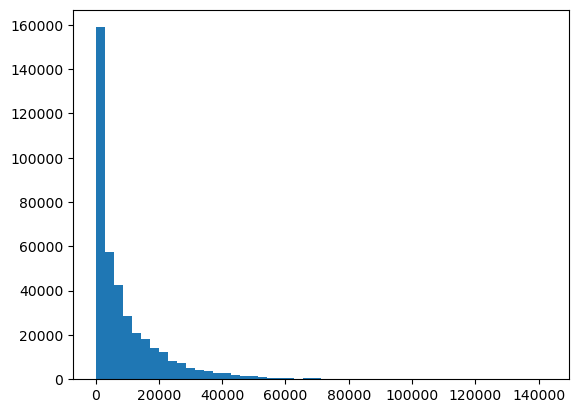

In [679]:
plt.hist(res_22_in_24['PR_1_TOT'], bins=50);